# __XOR-net__

In this notebook, we:
* Discuss the XOR function and its notoriety in the history of neural
  networking
* Discuss linear separability and how multi-layer networks can transform
  linearly *in*separable problems into linearly separable ones
* Use our neural network framework to construct a minimal (2 layer, 3 node, 9
  parameter) multi-layer perceptron that learns XOR
* Analyze the trained network and visualize its decision boundaries

NB: The neural network framework (and this analysis) is written without
numpy/pytorch/tensorflow/scikit-learn for educational purposes. It is wildly
inefficient.

Author: Jeremy Dolan

In [1]:
# feed forward network framework:
from neural_net_vanilla import *
# illustrations for this notebook:
import plots.xor_net

## XOR

XOR ("exclusive or") is a binary Boolean function; it maps 2 truth value
inputs (by convention: $0$ for false, $1$ for true) to one truth value output:

$$f : \{0,1\}^2 → \{0,1\}$$

The _input space_ for a binary Boolean function consists of 2 inputs with 2
possible values, giving us $2^2 = 4$ points: $(0,0)$, $(0,1)$, $(1,0)$, and
$(1,1)$. Each of those $2^2$ input pairs can independently map to 2 possible
output values, for a total of $2^{2^2} = 16$ possible functions. XOR is the
name we give to the function that maps points $(0,1)$ and $(1,0)$ to $1$, and
points $(0,0)$ and $(1,1)$ to $0$. It means, roughly: "One or the other, _but
not both_."

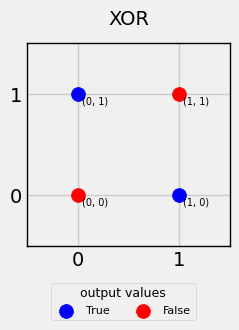

In [2]:
plots.xor_net.plot_binary_Boolean_input_space_with_XOR_output()

## Linear separability

As Minsky and Papert (1969) infamously argued, a single layer neural network
can only be made to fit linearly separable data: that is, data for which a
single, straight line can separate two classes of interest. For example, "OR"
(inclusive or) is linearly separable: it is true for three of the four points
in our Boolean input space, and we can draw a straight line "decision boundary"
which separates these three points from the one point where it is false (see
"OR classification," below left).

XOR, however, is _not_ linearly separable. There is no line you can draw that
will partition the input space in such a way as to separate the input points
that map to true—$(0,1)$ and $(1,0)$—from the input points that map to
false—$(0,0)$ and $(1,1)$ (see below right).

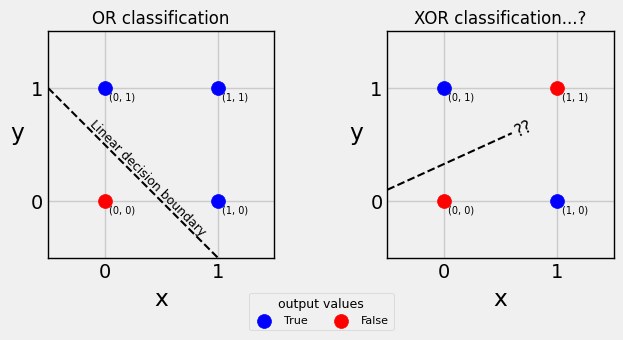

In [3]:
plots.xor_net.plot_linear_separation_OR_vs_XOR()

Minsky and Papert were correct that a *single-layer* neural network cannot
learn the XOR function, or any other linearly-inseparable function, no matter
how many nodes and connections it may have, or how we configure and train those
nodes and connections. With neither the computational power nor feasible
training techniques for *multi-layer* networks in sight, they argued that this
was a fundamental limitation for the connectionist approach to AI, relegating
neural networks to solving only toy problems, with no hope of scaling to
general purpose learning.[^1]

[^1]: Many commentators now credit Minsky and Papert's criticisms with playing
a large role in the shift away from neural network research (and a decline in
funding for AI in general) in the 1970s and early 1980s, although it seems this
causal claim is largely mythologized (see Olazaran (1996) "[A Sociological
Study of the Official History of the Perceptrons Controversy][1]"; and Liu
(2024) "[The Perceptron Controversy][2]").

[1]: https://journals.sagepub.com/doi/abs/10.1177/030631296026003005
[2]: https://yuxi-liu-wired.github.io/essays/posts/perceptron-controversy/#ref-olazaranHistoricalSociologyNeural1991

Thanks to Moore's Law, and the successful application of backpropagation and
gradient descent for training, modern neural networks are no longer limited to
a single layer, and can be hundreds of layers deep. But how does adding
additional layers allow an architecturally-simple feed-forward network to do
what a single layer cannot, namely, create non-linear decision boundaries in
order to model linearly-inseparable functions.

When a second layer is added, a linearly-inseparable problem can be broken into
linearly-separable steps. To help visualize this, we can construct a two-layer
network, and analyze how it learns XOR.


# Implementation

Now we construct and train a network so that it learns the XOR function.

### Activation and loss function choice
Since we are working with binary values and, in effect, modeling Boolean
algebra, sigmoid is a natural choice for the activation function throughout our
network. Sigmoid squashes its input between 0 and 1, and we can interpret its
proximity to 0 or 1 as corresponding to the probability of the input belonging
to the false (0) or true (1) class, which are the only values relevant when
modeling a Boolean function.
 
Likewise, log loss is a natural choice for the loss function on our network's
output, as it is designed for probabilistic outputs of a binary classification
— which is what our sigmoid activation function will produce.

For reference, here are graphs of the functions we'll use:

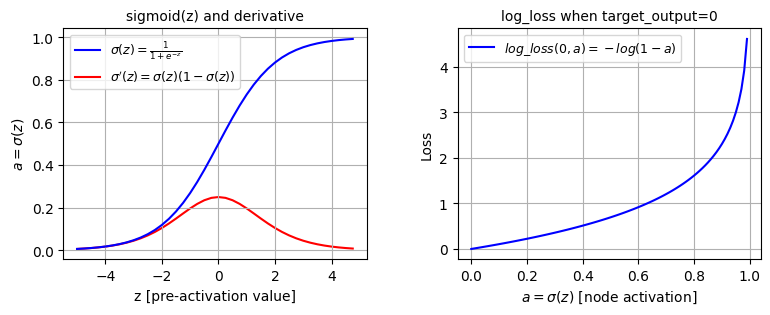

In [4]:
plots.xor_net.plot_functions(sigmoid, sigmoid_derivative, log_loss)

### Initialization

Initialize a network with the bare minimum depth (two layers) and breadth (two
hidden nodes, one output node) to implement XOR.

In [5]:
xor_net = Net(inputs=2, shape=[2, 1], activation_fxs=[sigmoid]*2, loss_fx=log_loss)
xor_net.show_params()

layer 1, node 1, n.weights=[-0.13215959274333, 0.05636702724398596] n.bias=0.0
layer 1, node 2, n.weights=[0.187098857353389, -0.10426655508710875] n.bias=0.0
layer 2, node 1, n.weights=[0.09786496212107337, -0.13795939074953087] n.bias=0.0


### Training

Our training data is simply all four input/output pairs for the XOR function:

In [6]:
# Our training method expects key 'x' for input and 'y' for true output
xor_training = (
    {'x': (0,0), 'y': (0)},
    {'x': (1,0), 'y': (1)},
    {'x': (0,1), 'y': (1)},
    {'x': (1,1), 'y': (0)},
)

Now we can train the network, using batch gradient decent:

In [7]:
# relatively high learning rate helps get us off initial plateau
xor_net.batch_train(training_data=xor_training, epochs=10_000, learning_rate=1.75)
xor_net.show_params()

epoch     1 loss=0.6932114114578929
epoch  1000 loss=0.6931446525520559
epoch  2000 loss=0.6931126035812384
epoch  3000 loss=0.014982758928286842
epoch  4000 loss=0.003970217739871293
epoch  5000 loss=0.0022710133108778097
epoch  6000 loss=0.001587470046515464
epoch  7000 loss=0.0012192669539668759
epoch  8000 loss=0.0009893052251955128
epoch  9000 loss=0.0008321170450059827
epoch 10000 loss=0.0007179133336874667
layer 1, node 1, n.weights=[7.313207026868332, -7.592099647435382] n.bias=-3.8453448257164395
layer 1, node 2, n.weights=[8.086931148216177, -7.868368103318026] n.bias=3.933222083722877
layer 2, node 1, n.weights=[15.737234956697131, -15.156562627211063] n.bias=7.249984217729704


### Prediction

In [8]:
for xor_case in xor_training:
    x, y = xor_case.values()        # input, correct output
    ŷ = xor_net.forward(x)[-1][0]   # predicted output
    emoji = '\u2705' if y == round(ŷ) else '\u274C'
    print(f'{x[0]} XOR {x[1]} -> {round(ŷ)} {emoji} (prediction: {ŷ:f}, loss: {log_loss(y, ŷ):f})')

0 XOR 0 -> 0 ✅ (prediction: 0.000685, loss: 0.000685)
1 XOR 0 -> 1 ✅ (prediction: 0.999361, loss: 0.000639)
0 XOR 1 -> 1 ✅ (prediction: 0.999051, loss: 0.000949)
1 XOR 1 -> 0 ✅ (prediction: 0.000598, loss: 0.000598)


## Visualizing the learned decision boundary of our trained network

🚧 🚧 🚧 🚧 🚧 🚧

In [9]:
start = -0.5
stop = 1.5
step = (stop-start)/2000    # sample 2000x2000 points
meshgrid = []
i = start
while i <= 1.5:
    row = []
    j = start
    while j <= 1.5:
        row.append(xor_net.forward((i,j))[-1][0])
        j += step
    meshgrid.append(row)
    i += step

meshgrid_node_1 = []
i = start
while i <= 1.5:
    row = []
    j = start
    while j <= 1.5:
        row.append(xor_net.layers[0].nodes[0].activate((i,j)))
        j += step
    meshgrid_node_1.append(row)
    i += step

meshgrid_node_2 = []
i = start
while i <= 1.5:
    row = []
    j = start
    while j <= 1.5:
        row.append(xor_net.layers[0].nodes[1].activate((i,j)))
        j += step
    meshgrid_node_2.append(row)
    i += step

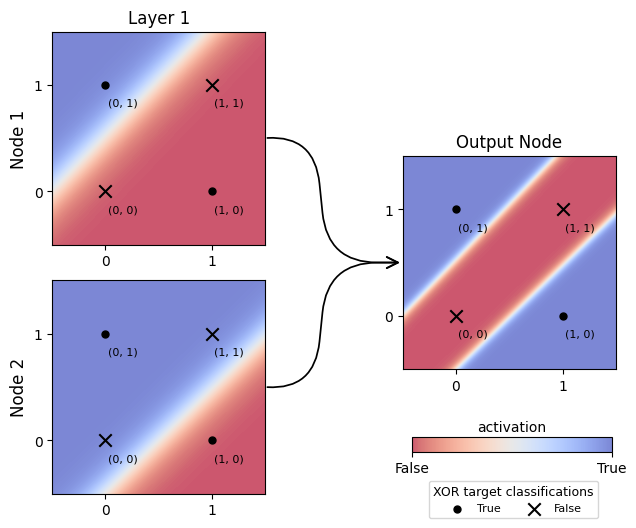

In [10]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import FancyArrowPatch

def setup_bool_gradient(ax:plt.Axes, meshgrid, title=None):
    ax.set(xticks=[0, 1], yticks=[0, 1], xlim=(-0.5, 1.5), ylim=(-0.5, 1.5))
    ax.set_aspect('equal') # make sure it's square
    ax.set_title(title, fontsize=12)
    # Draw and label XOR input/outputs
    True_XOR = [(0,1), (1,0)]
    False_XOR = [(0,0), (1,1)]
    ax.scatter(*zip(*True_XOR), color=(0,0,0), label='True', s=100, marker='.')
    ax.scatter(*zip(*False_XOR), color=(0,0,0), label='False', s=80, marker='x')
    for (x, y) in True_XOR + False_XOR:
        ax.text(x+0.02, y-0.2, f'({x}, {y})', fontsize=8)

    # Draw the x and y axes
    # ax.axhline(0, color='white', linewidth=0.5, linestyle='-.')
    # ax.axvline(0, color='white', linewidth=0.5, linestyle='-.')
    # ax.axhline(0, color='black', linewidth=1, linestyle='dotted')
    # ax.axvline(0, color='black', linewidth=1, linestyle='dotted')

    # overlay our activation values
    gradient = ax.imshow(
        meshgrid,
        extent=[-0.5, 1.5, -0.5, 1.5],
        origin='lower',     # data is x,y coordinates, not i,j row-columns
        cmap='coolwarm_r',  # red (0) to blue (1) gradient
        alpha=0.667         # make it lighter
    )
    return gradient


fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(4, 2, wspace=0.3, hspace=0.4) # wspace = width between columns as a fraction of the average axis width
#gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
ax1 = fig.add_subplot(gs[0:2, 0])      # top-left plot
ax2 = fig.add_subplot(gs[2:4, 0])      # bottom-left plot
ax3 = fig.add_subplot(gs[1:3, 1])      # center-right plot

ax1.set_ylabel('Node 1', fontsize=12) #, rotation=0)
ax2.set_ylabel('Node 2', fontsize=12)

setup_bool_gradient(ax1, meshgrid_node_1, 'Layer 1')
setup_bool_gradient(ax2, meshgrid_node_2)
color_grad = setup_bool_gradient(ax3, meshgrid, 'Output Node')

# Create a single colorbar for all subplots
cax = fig.add_subplot(gs[3, 1])
cbar = plt.colorbar(color_grad, cax=cax, orientation='horizontal', ticks=[0, 1], label='activation')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.set_position([0.61, 0.18, 0.25, 0.025])  # [left, bottom, width, height] in figure coordinates
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['False', 'True'])

# create a single legend for all subplots
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, fontsize=8, title='XOR target classifications', title_fontsize=9,
        loc='lower right', bbox_to_anchor=(0.85, 0.06), bbox_transform=fig.transFigure)

def middle_of_right_spline(ax:plt.Axes):
    bbox = ax.get_position()
    return [bbox.x1-0.001, (bbox.y0 + bbox.y1)/2] # nudge x value due to line curvature
def middle_of_left_spline(ax:plt.Axes):
    bbox = ax.get_position()
    return [bbox.x0, (bbox.y0 + bbox.y1)/2]


arrow_1_start = middle_of_right_spline(ax1)
arrow_1_stop = middle_of_left_spline(ax3)
arrow_2_start = middle_of_right_spline(ax2)
arrow_2_stop = middle_of_left_spline(ax3)


#arrow_1_start[0] -= 0.001 # nudge x value due to line curvature
arrow1 = FancyArrowPatch(arrow_1_start, arrow_1_stop, linewidth=1.25, color='black', arrowstyle='->', 
                         connectionstyle="arc,angleA=5,angleB=180,armA=50,armB=75,rad=50", mutation_scale=20)
arrow2 = FancyArrowPatch(arrow_2_start, arrow_2_stop, linewidth=1.25, color='black', arrowstyle='->', 
                         connectionstyle="arc,angleA=-5,angleB=180,armA=50,armB=75,rad=50", mutation_scale=20)

fig.add_artist(arrow1)
fig.add_artist(arrow2)

plt.show()

In [ ]:
# it doesn't matter how layer 1 carves out the two points (i.e., it doesn't
# matter which points get a ~0 or ~1 activation). All that matters is that in
# layer 1: node 1 learns a decision boundary that separates one point from the
# other three, and node 2 learns a decision boundary that separates out the
# diagonally opposite point. If we train again, we can visualize a 90º rotated
# boundary.

xor_net2 = Net(inputs=2, shape=[2, 1], activation_fxs=[sigmoid]*2, loss_fx=log_loss)
xor_net2.batch_train(training_data=xor_training, epochs=10_000, learning_rate=1.75)
xor_net2.show_params()

# Note that these two networks generalize quite differently to inputs from
# outside the training distribution (distribution shift)

in_domain_XY = (0, 1) # agreement
NewXY = (-0.5, 0.5)   # disagreement
xor_net.forward(NewXY)
xor_net2.forward(NewXY)

In [8]:
# use finite difference approximation to check our gradient algorithms:
e = 0.0001

# Layer 1 Node 1:
l1n1a = sigmoid(x[0] * xor_net.layers[0].nodes[0].weights[0] + \
                x[1] * xor_net.layers[0].nodes[0].weights[1] + \
                       xor_net.layers[0].nodes[0].bias)
# Layer 1 Node 2:
l1n2a = sigmoid(x[0] * xor_net.layers[0].nodes[1].weights[0] + \
                x[1] * xor_net.layers[0].nodes[1].weights[1] + \
                       xor_net.layers[0].nodes[1].bias)
# Layer 2 Node 1 (output node):
y_hat = sigmoid(l1n1a * xor_net.layers[1].nodes[0].weights[0] + \
                l1n2a * xor_net.layers[1].nodes[0].weights[1] + \
                        xor_net.layers[1].nodes[0].bias)
loss = log_loss(y, y_hat)


# introduce a difference to some one term:
l1n1a = sigmoid(x[0] * (xor_net.layers[0].nodes[0].weights[0] + 0) + \
                x[1] * xor_net.layers[0].nodes[0].weights[1] + \
                       xor_net.layers[0].nodes[0].bias + 0)
l1n2a = sigmoid(x[0] * (xor_net.layers[0].nodes[1].weights[0] + e) + \
                x[1] * xor_net.layers[0].nodes[1].weights[1] + \
                       xor_net.layers[0].nodes[1].bias)
y_hat = sigmoid(l1n1a * xor_net.layers[1].nodes[0].weights[0] + \
                l1n2a * xor_net.layers[1].nodes[0].weights[1] + \
                        xor_net.layers[1].nodes[0].bias)
loss_e = log_loss(y, y_hat)

print (f'dL/d[e] = {(loss_e - loss)/e}')


dL/d[e] = -3.3215836765104756e-08


Hat tips for their explanations of backpropagation:
* Rumelhart, Hinton, and Williams, "Learning representations by back-propagating errors" _Nature_ (1986)
* Michael A. Nielsen, "Neural networks and deep learning" http://neuralnetworksanddeeplearning.com/ (2015)